# Random Forest



Los arboles de desicion se ajustan muy bien a los datos de entrenamiento, sin embargo no permiten generalización. El overfiting es la caracteristica mas importante. Para dar solucion, se propone el algoritmo de random foreset basado en dos caracteristicas:

# 1. Se enetrenan varios árboles con diferentes subconjuntos del dataset original. Para ello se emplea bootstraping dentro de los datos del dataset inicial.


Dado un dataset con las siguientes caracteristicas:


|index|$y^{}$          |X1  |X2 |X3 |X4 |
|-|----------|-----|-----|-----|-----|
|1| |$y^{(1)}$ |$X_1^{1}$|$X_2^{1}$|$X_3^{1}$|$X_4^{1}$|
|2||$y^{(2)}$ |$X_1^{2}$|$X_2^{2}$|$X_3^{2}$|$X_4^{2}$|
|3||$y^{(3)}$ |$X_1^{3}$|$X_2^{3}$|$X_3^{3}$|$X_4^{3}$|
|4||$y^{(4)}$ |$X_1^{4}$|$X_2^{4}$|$X_3^{4}$|$X_4^{4}$|


Podemos definir como un hyperparametro el número de arboles, y también los datos que ingresan a cada árbol, para ello emplearemos la tecnica de [bootstraping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics).


El botstrapping es una técnica de muestreo con reposición que se realiza para cada árbol, asi si se tienen 10 árboles, el muestre con reposicion  para los indices puede ser como sigue:
```

In: np.random.randint(0, 4, (10,4))

  
Out: array([[1, 0, 3, 3],
       [2, 1, 2, 0],
       [2, 3, 3, 3],
       [0, 2, 2, 3],
       [2, 0, 3, 3],
       [1, 1, 2, 0],
       [2, 2, 1, 2],
       [3, 0, 1, 0],
       [3, 1, 0, 2],
       [2, 0, 2, 0]])

```

Lo anterior quiere decir que el conjunto de datos del árbol 1, puede ser entrenado con las  X1, X2, X3, X4 con los datos de entrenamiento 2, 1, 2, 0


Cada fila del anterior array es usado como input para entrenar cada arbol, notese que los valores se puden repetir para entrenar el árbol i-esimo. 


- Para cada nodo de todos los arboles se selecciona un número aleatorio de características, hasta cosntruir el árbol completo. 


Al final se tendran un conjunto de arboles de desición sobre los cuales se aplicará agregación, es decir, cuando se pasa un nuevo dato de entrenamiento los arboles realizan la clasificación y se toma el valor elegido por la mayoria de los arboles



bagging = Agregation + bootstraping


Random forest permite seleccionar las caracteristicas más importantes


La estategia para optimizar los bosques pueden ser elegidos como sigue:

Fijar el numero de caracteristicas y el criterio de parada.

1. Determinar el error como función del número de árboles.

2. Definido el número de árboles y calculamos el error como función del numero de caracteristicas.

3. Con el numero de arboles fijo y el numero de caracteristicas, se optmiza el criterio de parada, (numero minimo de datos de una hoja)




REF: https://www.youtube.com/watch?v=3pa0vtW64Ic&ab_channel=CodificandoBits
https://en.wikipedia.org/wiki/Bootstrap_aggregating

ref: http://www.cs.cmu.edu/~qyj/papersA08/11-rfbook.pdf

ref : https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb


Laboratorio: 

1. Cargar load digitis
```
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[95])
plt.show()
```

2, Aplicar random foreset usando sklearn

# 1. Cargar load digits


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

(1797, 64)


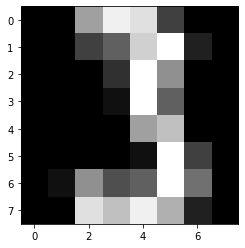

In [2]:

digits = load_digits()
print(digits.data.shape)
plt.gray()
plt.imshow(digits.images[60])

In [3]:
digits_df=pd.DataFrame(digits.data)
digits_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    digits_df, digits.target, test_size=0.33
)

In [5]:
model_list = []
maes = []
predictions=[]
n_estimators = np.arange(100, 2000, 10)

for i in range(len(n_estimators)):
    model_list.append(
        RandomForestClassifier(n_estimators=n_estimators[i], criterion="gini")
    )
    model_list[i].fit(x_train, y_train)
    predictions.append(model_list[i].predict(x_test))
    maes.append(metrics.mean_absolute_error(y_test,predictions[i]))
   



El número de árboles para el que el error medio absoluto es mínimo es:[650]. Tomaremos 660


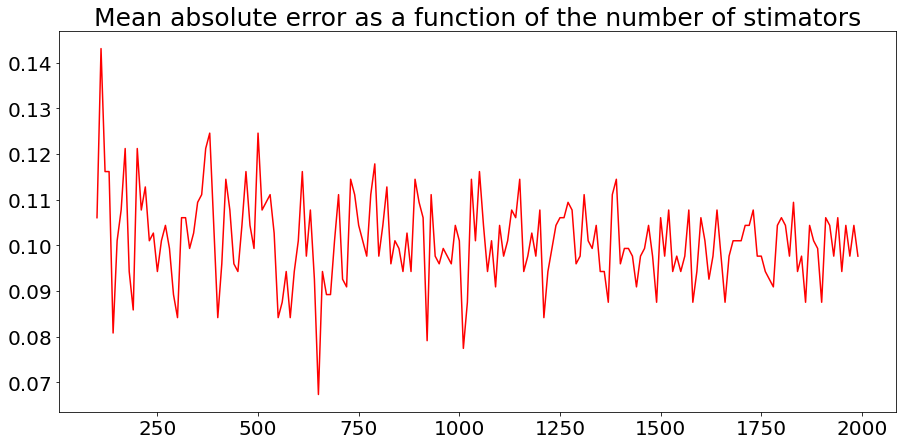

In [6]:
plt.figure(figsize=(15,7))
plt.title("Mean absolute error as a function of the number of stimators", fontsize="25")
plt.plot(n_estimators,maes,"r-")
plt.tick_params(labelsize="20")

print(f"El número de árboles para el que el error medio absoluto es mínimo es:{n_estimators[maes==np.min(maes)]}. Tomaremos 660")


In [11]:
max_features=['sqrt', 'log2']
models=[]
predictions=[]
maes=[]
for i in  range(len(max_features)):
    
    models.append(RandomForestClassifier(n_estimators=650,max_features=max_features[i] ))
    models[i].fit(x_train, y_train)
    predictions.append(models[i].predict(x_test))
    maes.append(metrics.mean_absolute_error(y_test,predictions[i]))

print(f"para número de características mejor tomar:'{max_features[np.argmin(maes)]}'")

para número de características mejor tomar:'sqrt'


In [12]:
min_samples_leaf = np.arange(1, 10, 1)
models = []
predictions = []
maes = []
for i in range(len(min_samples_leaf)):

    models.append(
        RandomForestClassifier(
            n_estimators=650, max_features="sqrt", min_samples_leaf=min_samples_leaf[i]
        )
    )
    models[i].fit(x_train, y_train)
    predictions.append(models[i].predict(x_test))
    maes.append(metrics.mean_absolute_error(y_test, predictions[i]))
print(f"El número mínimo de datos en una hoja que optimiza es: {min_samples_leaf[np.argmin(maes)]}")

El número mínimo de datos en una hoja que optimiza es: 1


# Construcción del modelo con los hiperparámetros optimizados

In [13]:
modelo=RandomForestClassifier(n_estimators=650, max_features="sqrt",min_samples_leaf=1 )
modelo.fit(x_train, y_train)
prediction=modelo.predict(x_test)

In [14]:
print(
    f"De los {len(x_test)} valores a predecir, {np.count_nonzero(prediction==y_test)} fueron predichos correctamente"
)

De los 594 valores a predecir, 575 fueron predichos correctamente
